# Adult Census Dataset Exploratory Data Analysis and Feature Engineering

# About Dataset

Abstract - For this assignment, we examine the Census Income dataset available at the UC Irvine Machine Learning Repository. We aim to predict whether an individual’s income will be greater than $50,000 per year based on several attributes from the census data.


#### Introduction

The US Adult Census dataset is a repository of 48,842 entries extracted from the 1994 US Census database.


- In our first section, we explore the data at face value in order to understand the trends and representations of certain demographics in the corpus. 

- We then use this information in section two to form models to predict whether an individual made more or less than $50,000 in 1994.

- In the third section, we look into a couple papers written on the dataset to find out what methods they are using to gain insight on the same data. 

- Finally, in the fourth section, we compare our models as well as that of others in order to find out what features are of significance, what methods are most effective, and gain an understanding of some of the
intuition behind the numbers.

## Dataset Features Description

The Census Income dataset has 48,842 entries. Each entry contains the following information

about an individual:


● <b>age:</b> the age of an individual  <br>
○ Integer greater than 0


● <b>workclass:</b> a general term to represent the employment status of an individual<br>
○ Private, Self­emp­not­inc, Self­emp­inc, Federal­gov, Local­gov, State­gov,
Without­pay, Never­worked.


● <b>fnlwgt:</b> final weight. In other words, this is the number of people the census believes
the entry represents..<br>
○ Integer greater than 0


● <b>education:</b> the highest level of education achieved by an individual.<br>
○ Bachelors, Some­college, 11th, HS­grad, Prof­school, Assoc­acdm, Assoc­voc,
9th, 7th­8th, 12th, Masters, 1st­4th, 10th, Doctorate, 5th­6th, Preschool.


● <b>education­num:</b> the highest level of education achieved in numerical form.<br>
○ Integer greater than 0


● <b>marital­status:</b> marital status of an individual. <br>
Married­civ­spouse corresponds to a
civilian spouse while Married­AF­spouse is a spouse in the Armed Forces.
○ Married­civ­spouse, Divorced, Never­married, Separated, Widowed,
Married­spouse­absent, Married­AF­spouse.


● <b>occupation:</b> the general type of occupation of an individual<br>
○ Tech­support, Craft­repair, Other­service, Sales, Exec­managerial,
Prof­specialty, Handlers­cleaners, Machine­op­inspct, Adm­clerical,
Farming­fishing, Transport­moving, Priv­house­serv, Protective­serv,
Armed­Forces.


● <b>relationship:</b> represents what this individual is relative to others. For example an
individual could be a Husband. Each entry only has one relationship attribute and is
somewhat redundant with marital status. We might not make use of this attribute at all <br>
○ Wife, Own­child, Husband, Not­in­family, Other­relative, Unmarried.


●<b> race:</b> Descriptions of an individual’s race<br>
○ White, Asian­Pac­Islander, Amer­Indian­Eskimo, Other, Black.


● <b>sex:</b> the biological sex of the individual<br>
○ Male, Female


● <b>capital­gain:</b> capital gains for an individual<br>
○ Integer greater than or equal to 0


● <b>capital­loss:</b> capital loss for an individual<br>
○ Integer greater than or equal to 0


● <b>hours­per­week:</b> the hours an individual has reported to work per week<br>
○ continuous.


● <b>native­country:</b> country of origin for an individual<br>
○ United­States, Cambodia, England, Puerto­Rico, Canada, Germany,
Outlying­US(Guam­USVI­etc), India, Japan, Greece, South, China, Cuba, Iran,
Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,
Ireland, France, Dominican­Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,
Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El­Salvador,
Trinadad&Tobago, Peru, Hong, Holand­Netherlands.


● <b>the label:</b> whether or not an individual makes more than $50,000 annually<br>
○ <=50k, >50k

In [1]:
# Importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Filter Warnings

import warnings

warnings.filterwarnings('ignore')

In [3]:
# Loading Dataset

data = pd.read_csv('adult.csv')

data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# Shape of Dataset

print('Shape: {}'.format(data.shape))
print('Number of Rows: {}'.format(data.shape[0]))
print('Number of Columns: {}'.format(data.shape[1]))

Shape: (48842, 15)
Number of Rows: 48842
Number of Columns: 15


In [5]:
# Checking for Numerical Columns

numeric_data = data.select_dtypes(['int64','float64'])

numeric_cols = numeric_data.columns

print(numeric_data)

print('Numerical Columns : {}'.format(list(numeric_cols)))

       age  fnlwgt  educational-num  capital-gain  capital-loss  \
0       25  226802                7             0             0   
1       38   89814                9             0             0   
2       28  336951               12             0             0   
3       44  160323               10          7688             0   
4       18  103497               10             0             0   
...    ...     ...              ...           ...           ...   
48837   27  257302               12             0             0   
48838   40  154374                9             0             0   
48839   58  151910                9             0             0   
48840   22  201490                9             0             0   
48841   52  287927                9         15024             0   

       hours-per-week  
0                  40  
1                  50  
2                  40  
3                  40  
4                  30  
...               ...  
48837              38  
488

In [6]:
# Checking for Categorical Columns

categorical_data = data.select_dtypes(['object'])

categorical_cols = categorical_data.columns

print(categorical_data)

print('Numerical Columns : {}'.format(list(categorical_cols)))

          workclass     education      marital-status         occupation  \
0           Private          11th       Never-married  Machine-op-inspct   
1           Private       HS-grad  Married-civ-spouse    Farming-fishing   
2         Local-gov    Assoc-acdm  Married-civ-spouse    Protective-serv   
3           Private  Some-college  Married-civ-spouse  Machine-op-inspct   
4                 ?  Some-college       Never-married                  ?   
...             ...           ...                 ...                ...   
48837       Private    Assoc-acdm  Married-civ-spouse       Tech-support   
48838       Private       HS-grad  Married-civ-spouse  Machine-op-inspct   
48839       Private       HS-grad             Widowed       Adm-clerical   
48840       Private       HS-grad       Never-married       Adm-clerical   
48841  Self-emp-inc       HS-grad  Married-civ-spouse    Exec-managerial   

      relationship   race  gender native-country income  
0        Own-child  Black    

In [7]:
# Info about Dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Exploratory Data Analysis

## 1. Univariate Analysis

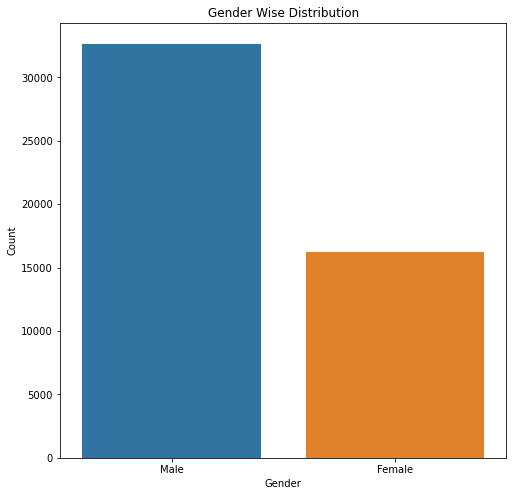

In [8]:
# Checking Marital Status of Individual

plt.figure(figsize = (8,8))

x = list(data['gender'].value_counts().index)

y = list(data['gender'].value_counts())

plt.title('Gender Wise Distribution')

plt.xlabel('Gender')

plt.ylabel('Count')

sns.barplot(x=x,y=y)

plt.show()

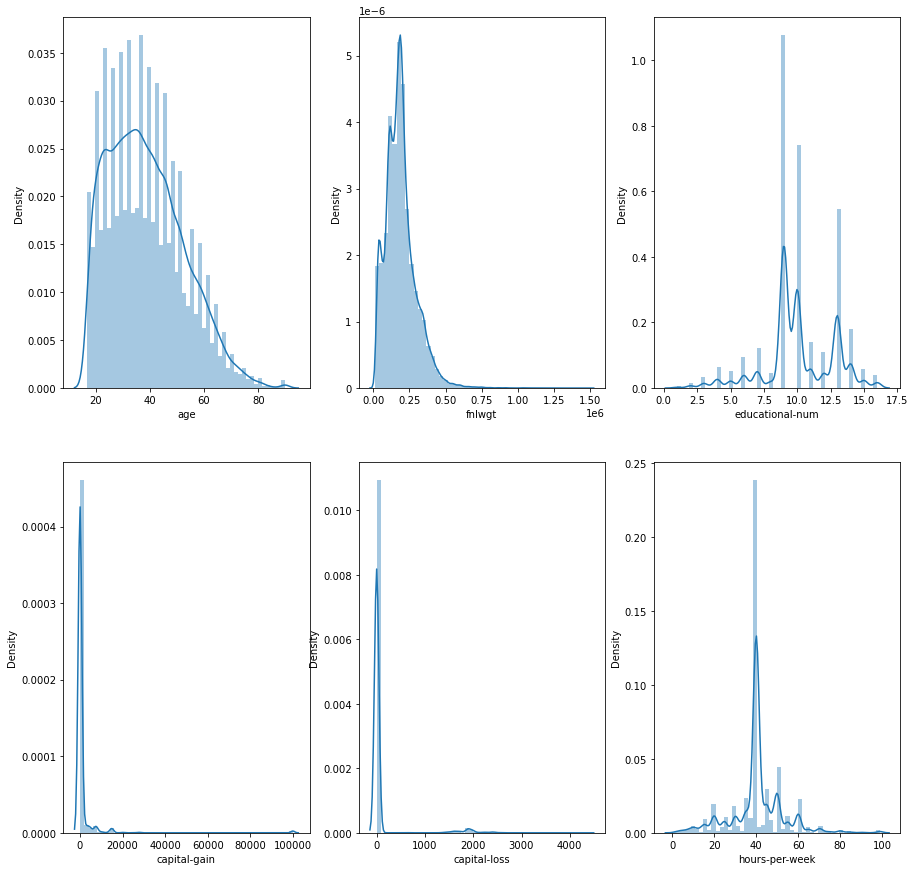

In [9]:
# Probablity Density Function Plots of Numerical Columns

plt.figure(figsize=(15,15))

cols = list(numeric_cols)

i = 1

for col in cols:
    
    plt.subplot(2,3,i)
    sns.distplot(data[col])
    
    i = i+1

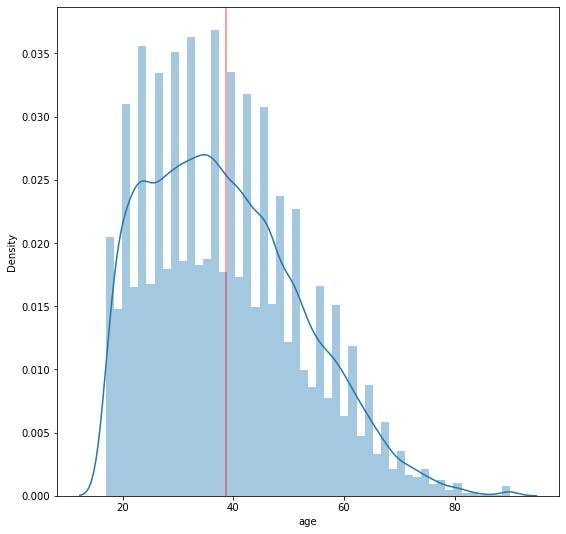

In [10]:
# Age Distribution

plt.figure(figsize=(9,9))

sns.distplot(data['age'])

plt.axvline(data['age'].mean(),c='r',alpha=0.5)

plt.show()

In [11]:
data['age'].skew()

0.5575803166133181

## Observation

- Age Distribution is a Right Skewed Normal Distribution with mean around 39

- This could potentially be caused by presence of outliers to the positive side (right)

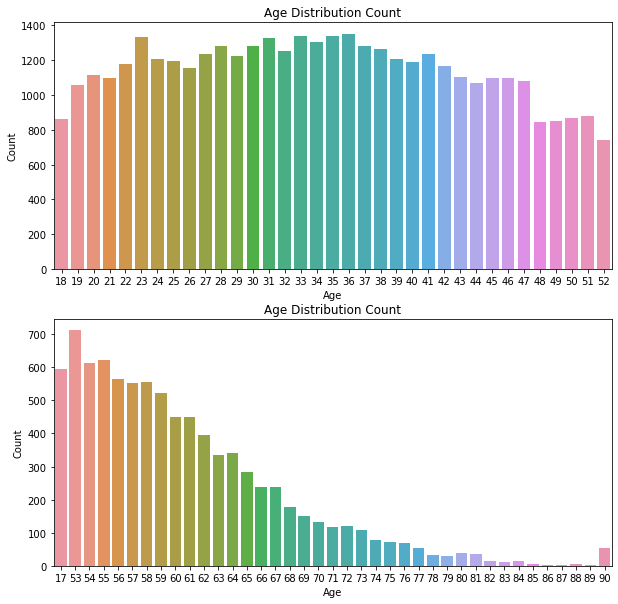

In [12]:
# Plotting Barplot to understand count of various age groups

plt.figure(figsize = (10,10))

x = list(data['age'].value_counts().index)

y = list(data['age'].value_counts())

plt.subplot(2,1,1)
sns.barplot(x= x[:35], y=y[:35])
plt.title('Age Distribution Count')
plt.xlabel('Age')
plt.ylabel('Count')


plt.subplot(2,1,2)
sns.barplot(x= x[35:], y=y[35:])
plt.title('Age Distribution Count')
plt.xlabel('Age')
plt.ylabel('Count')


plt.show()

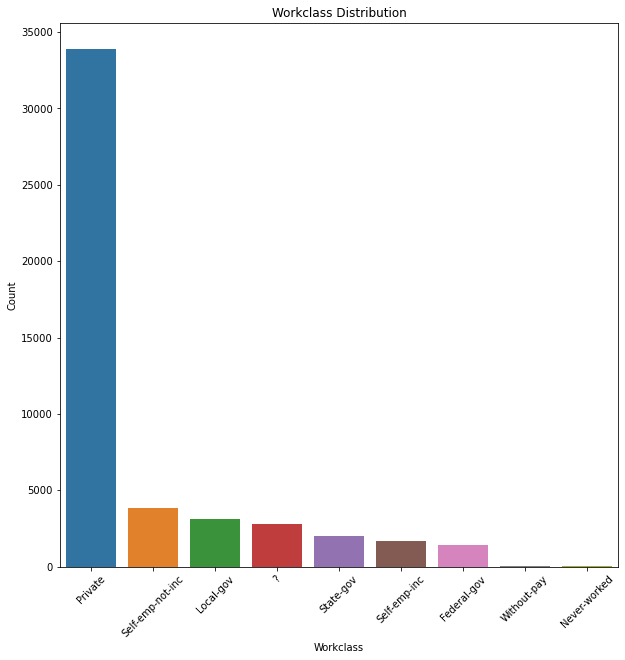

In [13]:
# Understanding Workclass of the population

plt.figure(figsize = (10,10))

x = list(data['workclass'].value_counts().index)

y = list(data['workclass'].value_counts())

plt.title('Workclass Distribution')

plt.xlabel('Workclass')

plt.ylabel('Count')

sns.barplot(x=x,y=y)

plt.xticks(rotation=45)

plt.show()

# Observation:

- We can observe that the majority of Workclass belongs to the Private Sector


- Very few percent of Worclass belong to Without-pay category

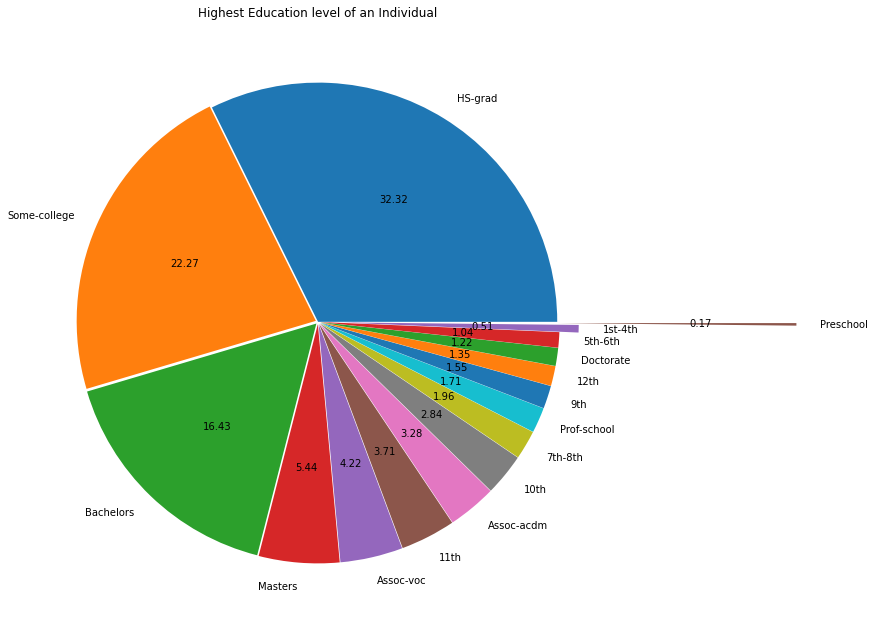

In [14]:
plt.figure(figsize=(11,11))

#ex = [0.01]*16

ex = [0.0,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.09,1]

x = list(data['education'].value_counts())

y = list(data['education'].value_counts().index)

plt.pie(x,labels=y,autopct='%.2f',explode=ex)

plt.title('Highest Education level of an Individual')

plt.show()

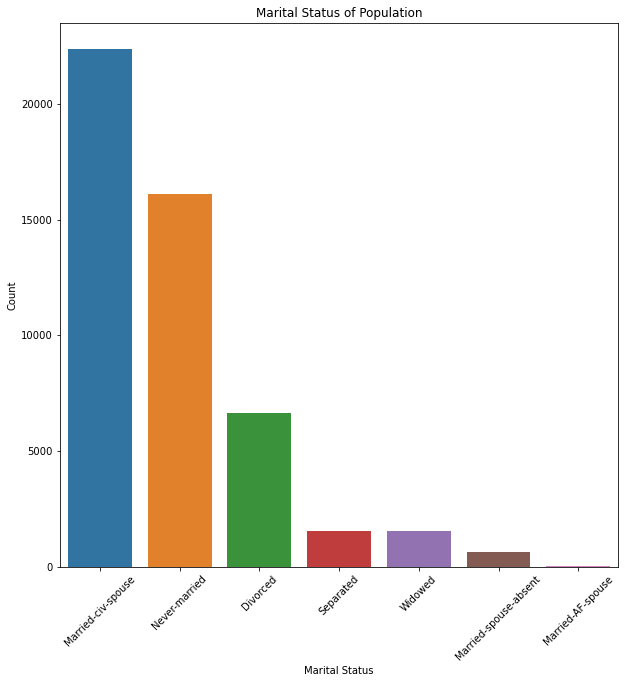

In [15]:
# Checking Marital Status of Individual

plt.figure(figsize = (10,10))

x = list(data['marital-status'].value_counts().index)

y = list(data['marital-status'].value_counts())

plt.title('Marital Status of Population')

plt.xlabel('Marital Status')

plt.ylabel('Count')

sns.barplot(x=x,y=y)

plt.xticks(rotation = 45)

plt.show()

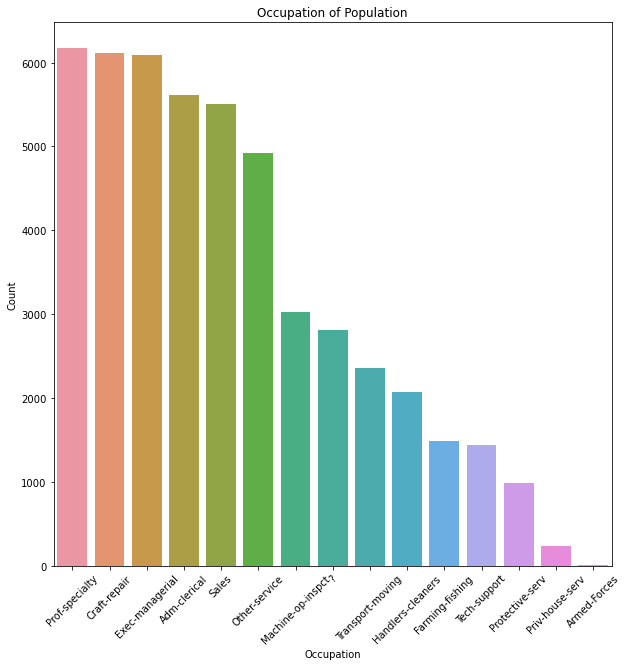

In [16]:
# Occupation Designation Distribution

plt.figure(figsize = (10,10))

x = list(data['occupation'].value_counts().index)

y = list(data['occupation'].value_counts())

plt.title('Occupation of Population')

plt.xlabel('Occupation')

plt.ylabel('Count')

sns.barplot(x=x,y=y)

plt.xticks(rotation = 45)

plt.show()

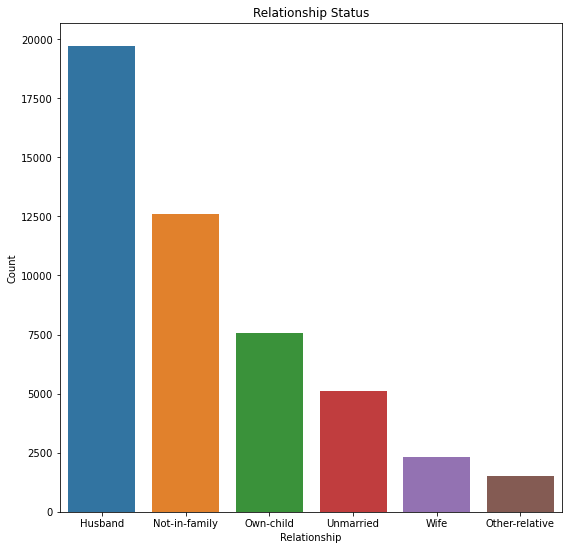

In [17]:
# Checking Relationship Status 

plt.figure(figsize = (9,9))

x = list(data['relationship'].value_counts().index)

y = list(data['relationship'].value_counts())

plt.title('Relationship Status')

plt.xlabel('Relationship')

plt.ylabel('Count')

sns.barplot(x=x,y=y)

#plt.xticks(rotation = 45)

plt.show()

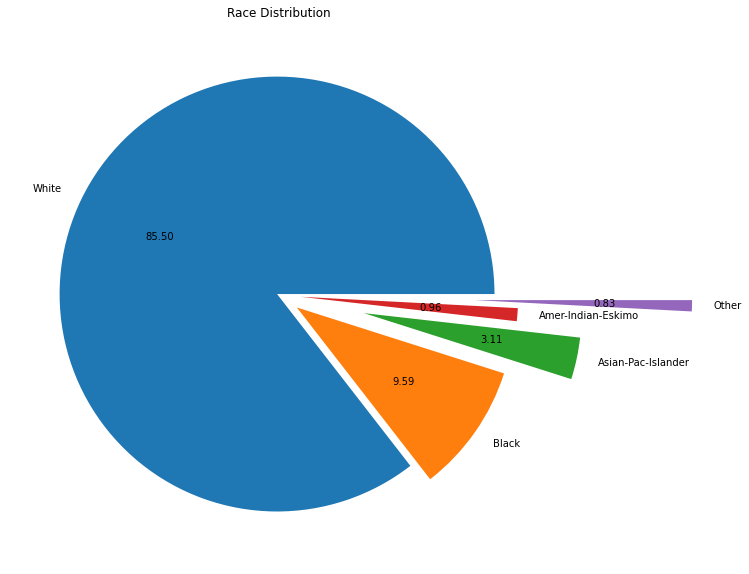

In [18]:
# Pie Chart to understand Race Distribution

plt.figure(figsize=(10,10))

ex = [0.01,0.1,0.4,0.1,0.9]

x = list(data['race'].value_counts())

y = list(data['race'].value_counts().index)

plt.pie(x,labels=y,autopct='%.2f',explode=ex)

plt.title('Race Distribution')

plt.show()

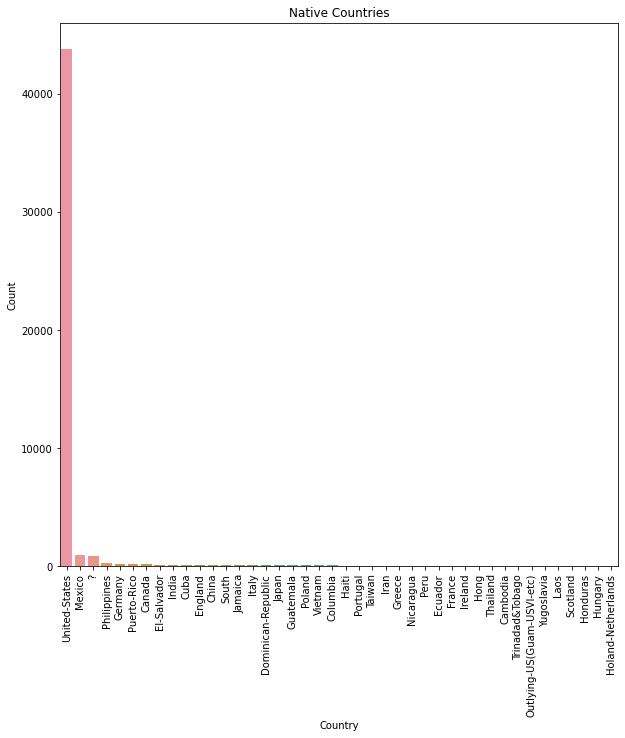

In [19]:
# Native Countries Distribution

plt.figure(figsize = (10,10))

x = list(data['native-country'].value_counts().index)

y = list(data['native-country'].value_counts())

plt.title('Native Countries')

plt.xlabel('Country')

plt.ylabel('Count')

sns.barplot(x=x,y=y)

plt.xticks(rotation = 90)

plt.show()

# Bivariate Analysis

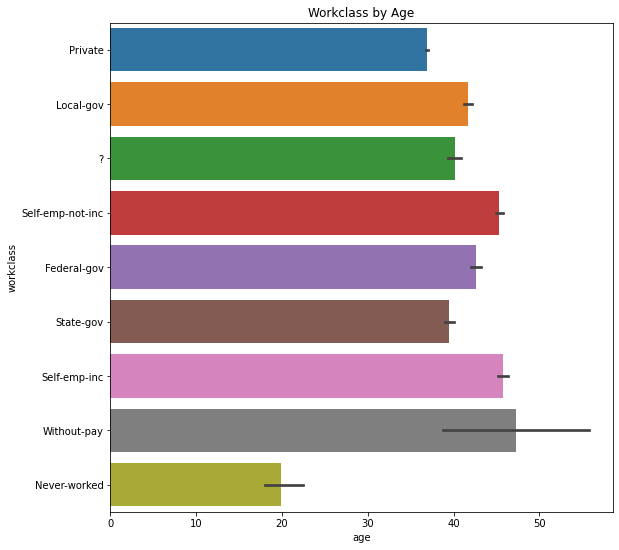

In [20]:
# Workclass by Age Distribution

plt.figure(figsize=(9,9))

sns.barplot(y='workclass',x='age',data=data)

plt.title('Workclass by Age')

plt.show()

<AxesSubplot:>

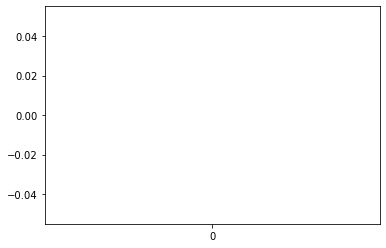

In [21]:
sns.barplot()

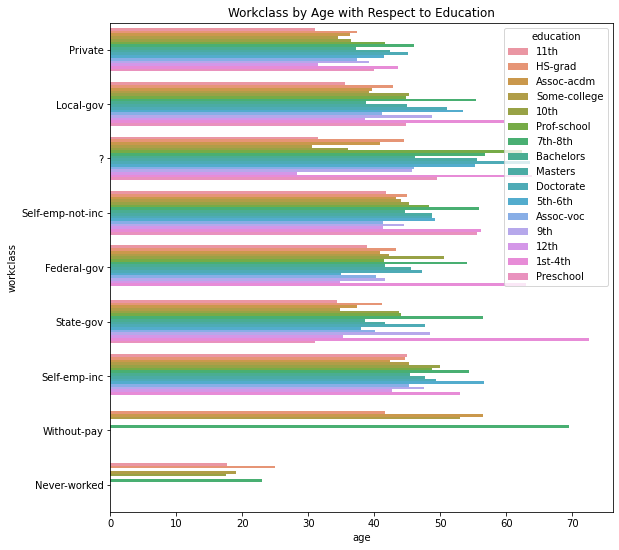

In [22]:
# Workclass by Age with Respect to Education Distribution

plt.figure(figsize=(9,9))

sns.barplot(y='workclass',x='age',hue='education',ci=None,data=data)

plt.title('Workclass by Age with Respect to Education')

plt.show()

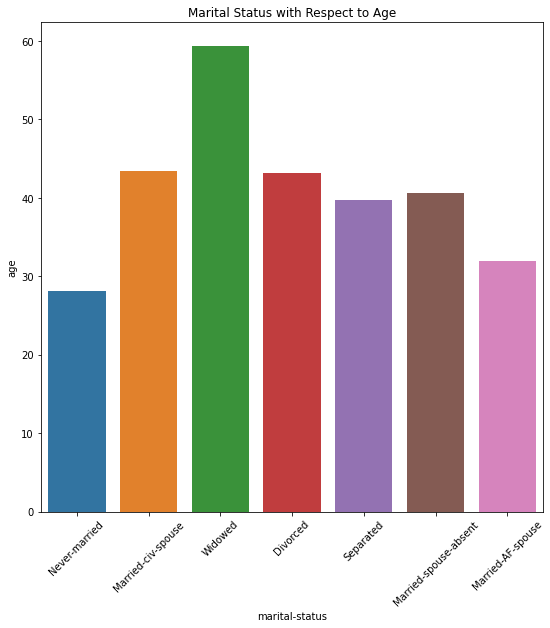

In [23]:
# Marital Status by Age Distribution

plt.figure(figsize=(9,9))

sns.barplot(x='marital-status',y='age',ci=None,data=data)

plt.title('Marital Status with Respect to Age')

plt.xticks(rotation=45)

plt.show()

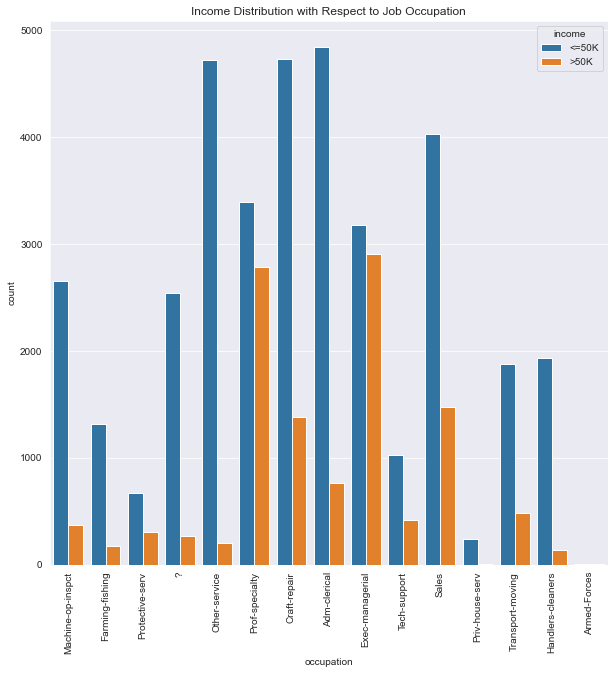

In [24]:
# Job Occupation with Respect to Income

plt.figure(figsize=(10,10))

sns.set_style('darkgrid')

sns.countplot(x='occupation',hue='income',data=data)

plt.title('Income Distribution with Respect to Job Occupation')

plt.xticks(rotation=90)

plt.show()

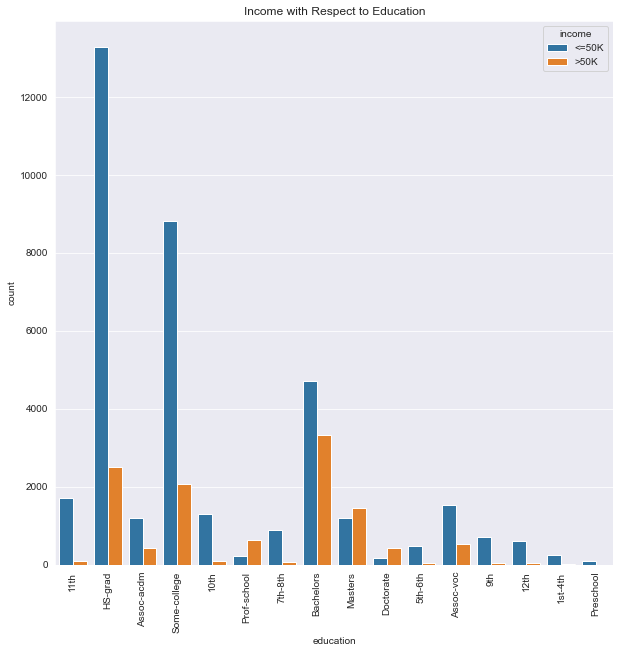

In [25]:
# Income with Respect to Education Level

plt.figure(figsize=(10,10))

sns.set_style('darkgrid')

sns.countplot(x='education',hue='income',data=data)

plt.title('Income with Respect to Education')

plt.xticks(rotation=90)

plt.show()

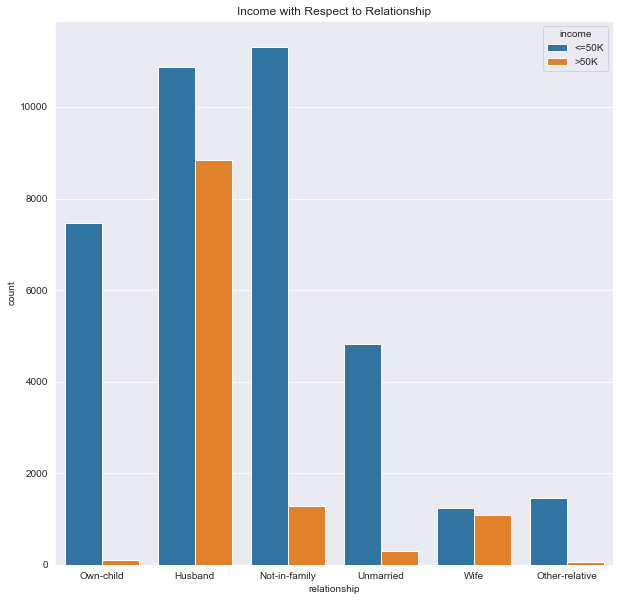

In [26]:
# Income with Respect to Relationship Status

plt.figure(figsize=(10,10))

sns.set_style('darkgrid')

sns.countplot(x='relationship',hue='income',data=data)

plt.title('Income with Respect to Relationship')

plt.show()

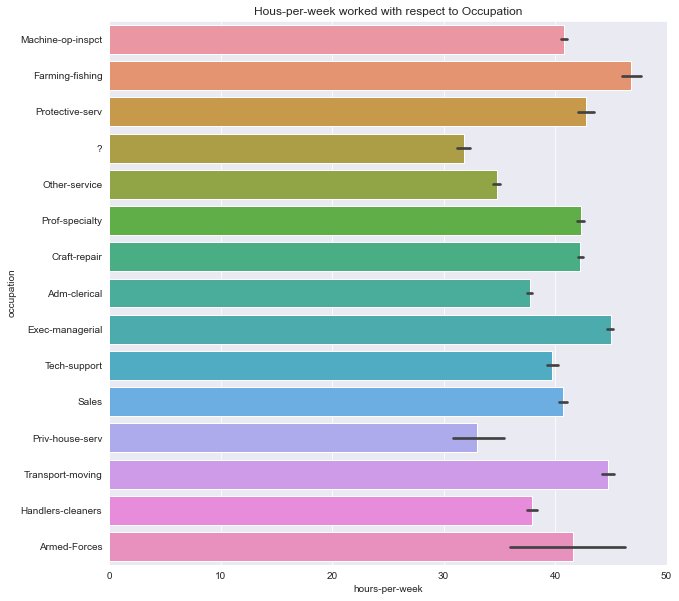

In [27]:
# Hours per week with Respect to Occupation

plt.figure(figsize=(10,10))

sns.set_style('darkgrid')

sns.barplot(x='hours-per-week',y='occupation',data=data)

plt.title('Hous-per-week worked with respect to Occupation')

plt.show()

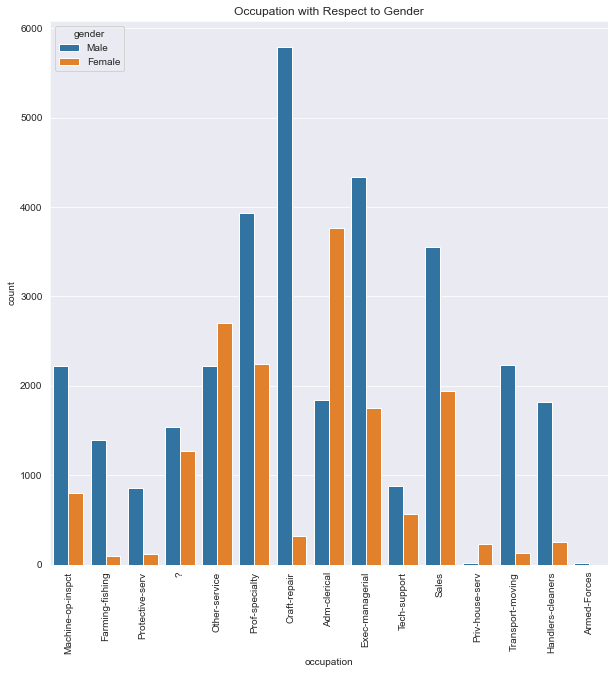

In [28]:
# Occupation with Respect to Gender

plt.figure(figsize=(10,10))

sns.set_style('darkgrid')

sns.countplot(x='occupation',hue='gender',data=data)

plt.title('Occupation with Respect to Gender')

plt.xticks(rotation=90)

plt.show()

In [29]:
data['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [30]:
# Percentage of Working Male & female

percent = (data['gender'].value_counts() / data.shape[0] ) * 100

percent

Male      66.848204
Female    33.151796
Name: gender, dtype: float64

In [31]:
data['income_category'] = ''

data.loc[data['income'] == '>50K', ['income_category']] = 'high income'

data.loc[data['income'] == '<=50K', ['income_category']] = 'low income'

data.loc[:, 'income_category'].head()

0     low income
1     low income
2    high income
3    high income
4     low income
Name: income_category, dtype: object

In [32]:
# Let us also look into the racewise gender distibution of income

racewise_income = data.pivot_table(values=['income_category'], 
                                      index=['income', 'race', 'gender'], 
                                      aggfunc = 'count')
racewise_income

income_category
income race               gender                 
<=50K  Amer-Indian-Eskimo Female              170
                          Male                245
       Asian-Pac-Islander Female              448
                          Male                662
       Black              Female             2176
                          Male               1943
       Other              Female              144
                          Male                212
       White              Female            11485
                          Male              19670
>50K   Amer-Indian-Eskimo Female               15
                          Male                 40
       Asian-Pac-Islander Female               69
                          Male                340
       Black              Female              132
                          Male                434
       Other              Female               11
                          Male                 39
       White              Female             1542
                          Male               9065

In [33]:
data.pivot_table(values=['income'], index=['workclass', 'gender'], aggfunc='count')

income
workclass        gender        
?                Female    1270
                 Male      1529
Federal-gov      Female     452
                 Male       980
Local-gov        Female    1258
                 Male      1878
Never-worked     Female       3
                 Male         7
Private          Female   11599
                 Male     22307
Self-emp-inc     Female     211
                 Male      1484
Self-emp-not-inc Female     629
                 Male      3233
State-gov        Female     763
                 Male      1218
Without-pay      Female       7
                 Male        14

# Feature Engineering

### We have encountered many Missing and Outliers while exploring the data. Now we have to remove these anamolies in order to feed clean data to our Machine Learning Model

# Missing Values Treatment

In [34]:
# Null values exist in the dataset in the form of ?

# Replacing ? with np.nan
columns = list(data.columns)

for col in columns:
    
    data[col] = data[col].replace('?',np.nan)

In [35]:
# Now we can see the null values is present in some of the columns

a = data.isnull().any()

print(a)

age                False
workclass           True
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation          True
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country      True
income             False
income_category    False
dtype: bool


In [36]:
# Checking Total Missing values in columns containing missing values

li = list(a.index)

count = 0

null_count = {}

for col in li:
    
    if data[col].isnull().any() == True:
       
        count = data[col].isnull().sum()
        
        null_count[col] = count

print(null_count)

{'workclass': 2799, 'occupation': 2809, 'native-country': 857}


In [37]:
# Dropping Null values

data = data.loc[data['native-country'].notnull(), :]

data = data.loc[data['occupation'].notnull(), :]

data = data.loc[data['workclass'].notnull(), :]

In [38]:
data.isnull().any()

age                False
workclass          False
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation         False
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
income_category    False
dtype: bool

In [39]:
data.shape

(45222, 16)

In [40]:
# Percentage of rows lost in data cleaning.

percent = (48842 - len(data.index)) * 100 / 48842

print('Percentage of Rows Lost: {}'.format(percent))

Percentage of Rows Lost: 7.411653904426518


# Observation:

- We lost about <b>~7 percent</b> of rows in data cleaning which is fine

In [41]:
# Dropping columns fnlwgt , capital-gain , and capital-loss as they are insignificant for us to derive any conclusions.

data.drop(columns=['fnlwgt','capital-gain','capital-loss','income_category'],axis=1,inplace=True)

data.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K


In [42]:
numeric_data = data.select_dtypes(['int64','float64']).columns
numeric_data

Index(['age', 'educational-num', 'hours-per-week'], dtype='object')

# Outlier Detection and Treatment

In [43]:
# Number of Outliers in each feature (Numerical)

outliers = pd.DataFrame(columns=['Feature','Number of Outliers','Percentage']) # Creating a new dataframe
    
for column in list(numeric_data): # Iterating thorough each feature 
        
    # first quartile (Q1)
    q1 = data[column].quantile(0.25) 
            
    # third quartile (Q3)
    q3 = data[column].quantile(0.75)
            
    # IQR
    iqr = q3 - q1
        
    fence_low = q1 - (1.5*iqr)
        
    fence_high = q3 + (1.5*iqr)
        
    # finding the number of outliers using 'and(|) condition. 
    total_outlier = data[(data[column] < fence_low) | (data[column] > fence_high)].shape[0]
    
    percent = (total_outlier / len(data[column])) * 100
        
    outliers = outliers.append({'Feature':column,'Number of Outliers':total_outlier,'Percentage':percent},ignore_index=True)
        
outliers

,Feature,Number of Outliers,Percentage
0,age,269,0.594843
1,educational-num,294,0.650126
2,hours-per-week,11899,26.312414


#### We can observe that hours-per-week column contains a high percentage of outliers ~ 28

#### Rest all columns contains significantly low percentage of outliers

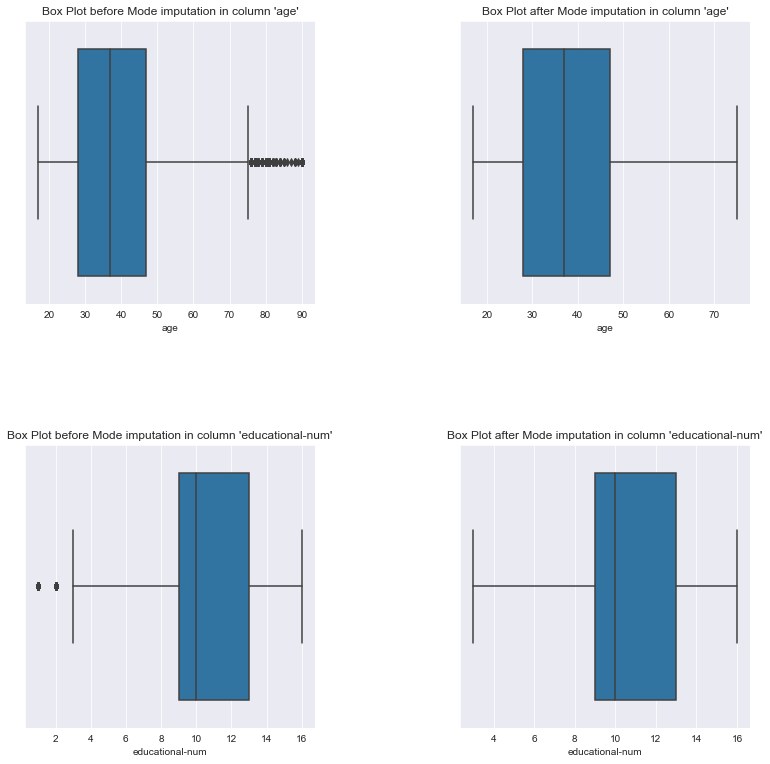

In [44]:
# Imputing Mode in columns having low percentage of outliers

plt.figure(figsize=(13,13))

plt.subplots_adjust(wspace=0.5,hspace=0.5)

cols = list(outliers['Feature'].iloc[:2].values)

i = 1

for col in cols:

    plt.subplot(2,2,i)
    sns.boxplot(data[col])
    plt.title("Box Plot before Mode imputation in column '{}'".format(col))
    
    #plt.show()
    # Replacing Outliers
    q1 = data[col].quantile(0.25)
    
    q3 = data[col].quantile(0.75)
    
    # Iqr
    iqr = q3-q1
    
    Lower_tail = q1 - 1.5 * iqr
    
    Upper_tail = q3 + 1.5 * iqr
    
    m = data[col].mode()[0]
    
    for val in data[col]:
        
        if val > Upper_tail or val < Lower_tail:
            
                data[col] = data[col].replace(val, m)
                
    plt.subplot(2,2,i+1)
    sns.boxplot(data[col])
    plt.title("Box Plot after Mode imputation in column '{}'".format(col))
    
    i = i+2
    #plt.show() 

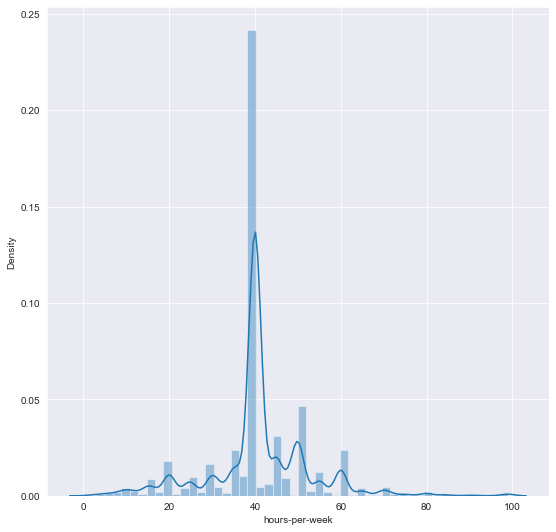

In [45]:
# Treating Outliers in Hours-per-week Column

# Hours-per-week Distribution

plt.figure(figsize=(9,9))

sns.distplot(data['hours-per-week'])

plt.show()

In [46]:
# Checking Normality using QQ PLOT

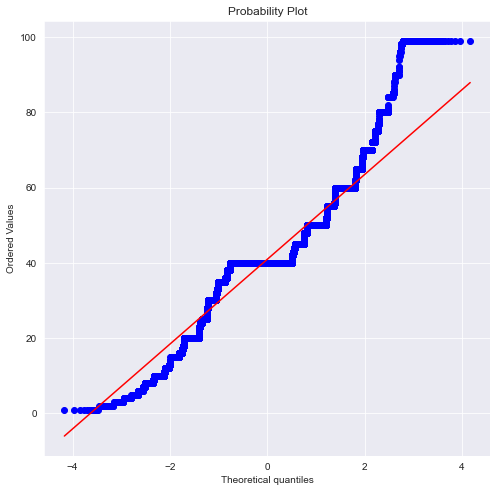

In [47]:
plt.figure(figsize=(8,8))

stats.probplot(data['hours-per-week'] , dist = 'norm' , plot = plt)

plt.show()

# Applying box-cox transformation in hours-per-week column

In [48]:
dat = np.array(data['hours-per-week'])

x_t1, l1 = stats.boxcox(dat)

In [49]:
x_t1

array([34.66006967, 43.16400616, 34.66006967, ..., 34.66006967,
       17.34273856, 34.66006967])

In [50]:
l1

0.957404248835031

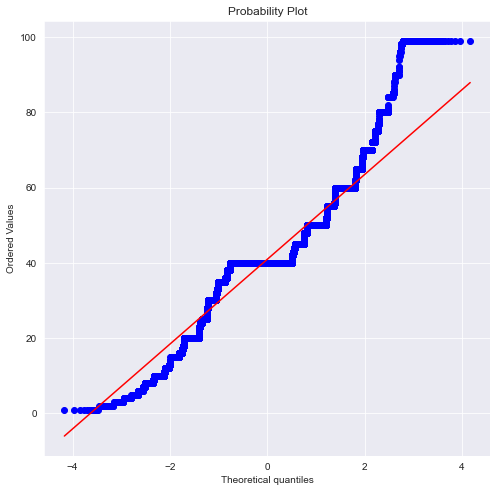

In [51]:
plt.figure(figsize=(8,8))

stats.probplot(dat , dist = 'norm' , plot = plt)

plt.show()

#### Observation : 

- We can Infer that Box-Cox Transformation doesnot significantly helps with Outlier Treatment

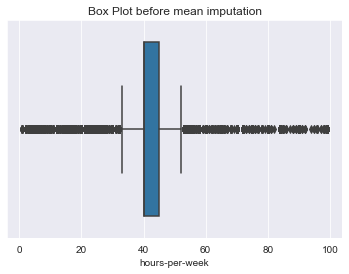

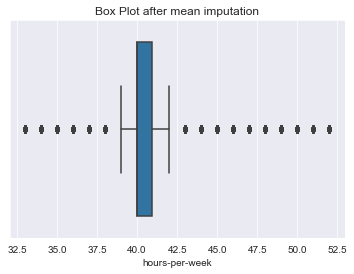

In [52]:
# Mean Imputation in column hours-per-week

sns.boxplot(data['hours-per-week'])

plt.title("Box Plot before mean imputation")
plt.show()
q1 = data['hours-per-week'].quantile(0.25)
q3 = data['hours-per-week'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(data['hours-per-week'])
for i in data['hours-per-week']:
    if i > Upper_tail or i < Lower_tail:
            data['hours-per-week'] = data['hours-per-week'].replace(i, m)
sns.boxplot(data['hours-per-week'])
plt.title("Box Plot after mean imputation")
plt.show() 

# Data Preprocessing

In [53]:
# Standardizing Numerical Columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numerical = data.select_dtypes(include=['int64', 'float64'])
    
df_num = pd.DataFrame(scaler.fit_transform(numerical),columns = numerical.columns)

df_num.head()

,age,educational-num,hours-per-week
0,0.137931,0.307692,0.368421
1,0.362069,0.461538,0.894737
2,0.189655,0.692308,0.368421
3,0.465517,0.538462,0.368421
4,0.293103,0.230769,0.417790


In [55]:
# Encoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

categorical = data.select_dtypes('object')

df_cat = pd.DataFrame(encoder.fit_transform(categorical), 
                      columns=encoder.get_feature_names(categorical.columns))

df_cat.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [56]:
# Preprocessed Dataset

train_data = pd.concat([df_num, df_cat], axis=1)

train_data.head()

,age,educational-num,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.137931,0.307692,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.362069,0.461538,0.894737,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.189655,0.692308,0.368421,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.465517,0.538462,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.293103,0.230769,0.417790,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [57]:
# Splitting Columns

X = train_data.iloc[:,:-1]

y = train_data.iloc[:,-1]

In [61]:
# Splitting Train and Test Data

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X, y, random_state=42)

# Applying Vanilla Models

### 1. Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()

clf_lr.fit(X_train, y_train)

LogisticRegression()

In [71]:
# Prediction on Test Dataset

y_pred_lr = clf_lr.predict(X_test)

y_pred_lr

array([0., 0., 0., ..., 0., 0., 1.])

### Evaluating Model

In [72]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred_lr)

0.8330090217583584

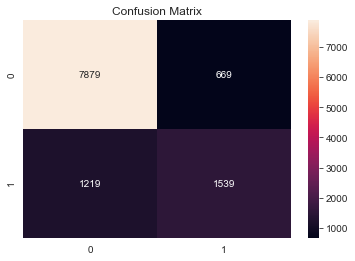

In [73]:
# Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.show()

In [74]:
# Logistic Regression Model Tuning (Using Regularization)

lr_score = {}

for this_C in [0.1, 1, 100]:
    
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    
    score = clf.score(X_test,y_test)
    
    lr_score[this_C] = score

In [75]:
lr_score

{0.1: 0.8324783300902175, 1: 0.8330090217583584, 100: 0.8332743675924288}

In [76]:
# Model Tuning in case of Logistic Regression doesnot significantly improves the accuray score

In [79]:
# ROC AUC Score

prob = clf_lr.predict_proba(X_test)

prob = prob[:, 1]

roc_auc_lr = metrics.roc_auc_score(y_test, prob)

print('Logistic Regression ROC_AUC Score : {}'.format(roc_auc_lr))

Logistic Regression ROC_AUC Score : 0.8842800185142266


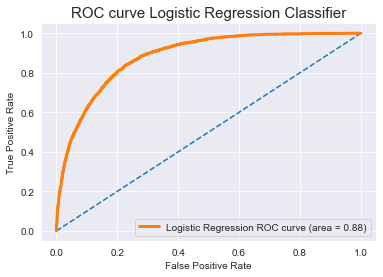

In [118]:
# Plotting Roc Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, prob)

plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model
plt.plot(fpr, tpr, lw=3, label='Logistic Regression ROC curve (area = {:0.2f})'.format(roc_auc_lr))

plt.title('ROC curve Logistic Regression Classifier', fontsize=15)

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

## 2. K - Nearest Neighbour Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors = 5)

clf_knn.fit(X_train,y_train)

In [ ]:
y_pred_knn = clf_knn.predict(X_test)

### Model Evaluation

In [ ]:
print('Accuracy of KNN on training set: {:.2f}'
     .format(clf_knn.score(X_train, y_train)))
print('Accuracy of KNN on test set: {:.2f}'
     .format(clf_knn.score(X_test, y_test)))

In [ ]:
# Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.show()

In [ ]:
# ROC AUC Score

prob_knn = clf_knn.predict_proba(X_test)

prob_knn = prob_knn[:, 1]

roc_auc_knn = metrics.roc_auc_score(y_test, prob_knn)

print('KNN ROC_AUC Score : {}'.format(roc_auc_knn))

In [ ]:
# Plotting Roc Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_knn)

plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model

plt.plot(fpr, tpr, lw=3, label='SVC ROC curve (area = {:0.2f})'.format(roc_auc_knn))

plt.title('ROC curve KNN', fontsize=15)

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

## 3. Linear SVC (Support Vector Classifier)

In [105]:
# Linear SVC

from sklearn.svm import SVC 

#this_C is Regularization factor set to 1.00
#this_C = 1.0
#Linear kernel

clf_svc = SVC(kernel = 'linear')

clf_svc.fit(X_train, y_train)

SVC(kernel='linear')

In [108]:
# Prediction on test dataset

y_pred_svc = clf_svc.predict(X_test)
y_pred_svc

array([0., 0., 0., ..., 0., 0., 0.])

## Model Evaluation

In [106]:
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf_svc.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf_svc.score(X_test, y_test)))

Accuracy of Linear SVC classifier on training set: 0.83
Accuracy of Linear SVC classifier on test set: 0.83


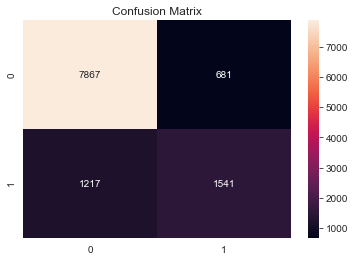

In [109]:
# Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.show()

In [111]:
# ROC AUC Score

prob_svc = clf_lr.predict_proba(X_test)

prob_svc = prob_svc[:, 1]

roc_auc_svc = metrics.roc_auc_score(y_test, prob_svc)

print('Support Vector Classifier Linear Kernel ROC_AUC Score : {}'.format(roc_auc_svc))

Support Vector Classifier Linear Kernel ROC_AUC Score : 0.8842800185142266


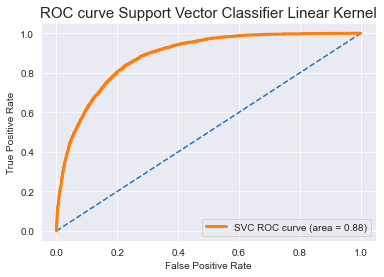

In [116]:
# Plotting Roc Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_svc)

plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model

plt.plot(fpr, tpr, lw=3, label='SVC ROC curve (area = {:0.2f})'.format(roc_auc_svc))

plt.title('ROC curve Support Vector Classifier Linear Kernel', fontsize=15)

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

## 3.1 RBF Kernel SVC (Support Vector Classifier)

In [ ]:
# Linear SVC

from sklearn.svm import SVC 

#this_C is Regularization factor set to 1.00
#this_C = 1.0
#Linear kernel

# Default Kernel is Rbf (Radio basis Function)
clf_svcR = SVC(probability=True)

clf_svcR.fit(X_train, y_train)

In [121]:
# Prediction on test dataset

y_pred_svcR = clf_svcR.predict(X_test)
y_pred_svcR

array([0., 0., 0., ..., 0., 0., 0.])

## Model Evaluation

In [122]:
print('Accuracy of RBF SVC classifier on training set: {:.2f}'
     .format(clf_svcR.score(X_train, y_train)))
print('Accuracy of RBF SVC classifier on test set: {:.2f}'
     .format(clf_svcR.score(X_test, y_test)))

Accuracy of Linear SVC classifier on training set: 0.83
Accuracy of Linear SVC classifier on test set: 0.84


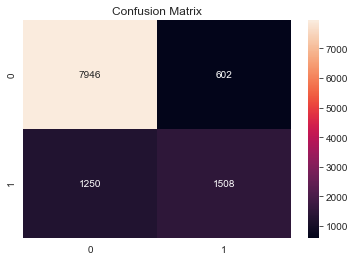

In [123]:
# Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_svcR), annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.show()

In [127]:
# ROC AUC Score

prob_svcR = clf_svcR.predict_proba(X_test)

prob_svcR = prob_svcR[:, 1]

roc_auc_svcR = metrics.roc_auc_score(y_test, prob_svcR)

print('Support Vector Classifier RBF Kernel ROC_AUC Score : {}'.format(roc_auc_svcR))

AttributeError: predict_proba is not available when  probability=False

In [ ]:
# Plotting Roc Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_svcR)

plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model

plt.plot(fpr, tpr, lw=3, label='SVC RBF kernel ROC curve (area = {:0.2f})'.format(roc_auc_svcR))

plt.title('ROC curve Support Vector Classifier RBF Kernel', fontsize=15)

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [ ]:
# Using Both c and gamma

from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):
    
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                 X_test, y_test, title,
                                                 subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

## 4. Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nbclf = GaussianNB()

nbclf.fit(X_train, y_train)

In [ ]:
# Prediction on test dataset

y_pred_gnb = clf_svcR.predict(X_test)
y_pred_gnb

## Model Evaluation

In [ ]:
print('Accuracy of Gaussian NB classifier on training set: {:.2f}'
     .format(nbclf.score(X_train, y_train)))
print('Accuracy of Gaussian NB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))

In [ ]:
# Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_gnb), annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.show()

In [ ]:
# ROC AUC Score

prob_nb = nbclf.predict_proba(X_test)

prob_nb = prob_nb[:, 1]

roc_auc_gnb = metrics.roc_auc_score(y_test, prob_nb)

print('Gaussian NB ROC_AUC Score : {}'.format(roc_auc_gnb))

In [ ]:
# Plotting Roc Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_nb)

plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model

plt.plot(fpr, tpr, lw=3, label='Gaussian NB ROC curve (area = {:0.2f})'.format(roc_auc_gnb))

plt.title('ROC Curve Gaussian NB', fontsize=15)

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

## 5. Decision Tree Classifier

In [1]:
# Max Depth Parameter

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()

clf_dt.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
y_pred_dt = clf_dt.predict(X_test)

### Model Evaluation

In [ ]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf_dt.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf_dt.score(X_test, y_test)))

In [ ]:
import matplotlib.pyplot as plt
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf_dt, iris.feature_names)
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

In [ ]:
# Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.show()

In [ ]:
# ROC AUC Score

prob_dt = clf_dt.predict_proba(X_test)

prob_dt = prob_dt[:, 1]

roc_auc_dt = metrics.roc_auc_score(y_test, prob_dt)

print('Decision Trees ROC_AUC Score : {}'.format(roc_auc_dt))

In [ ]:
# Plotting Roc Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_dt)

plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model

plt.plot(fpr, tpr, lw=3, label='Decision Trees ROC curve (area = {:0.2f})'.format(roc_auc_dt))

plt.title('ROC Curve Decision Trees', fontsize=15)

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

## 6. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rfc = RandomForestClassifier()

clf_rfc.fit(X_train, y_train)

In [ ]:
y_pred_rfc = clf_rfc.predict(X_test)

### Model Evaluation

In [ ]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf_rfc.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf_rfc.score(X_test, y_test)))

In [ ]:
# Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_rfc), annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.show()

In [ ]:
# ROC AUC Score

prob_rfc = clf_rfc.predict_proba(X_test)

prob_rfc = prob_rfc[:, 1]

roc_auc_rfc = metrics.roc_auc_score(y_test, prob_rfc)

print('Random Forest ROC_AUC Score : {}'.format(roc_auc_rfc))

In [ ]:
# Plotting Roc Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_rfc)

plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model

plt.plot(fpr, tpr, lw=3, label='Random Forest ROC curve (area = {:0.2f})'.format(roc_auc_rfc))

plt.title('ROC Curve Random Forest', fontsize=15)

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

## 7. Extra Tree Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

clf_etc = ExtraTreesClassifier(n_estimators=100, random_state=0)

clf_etc.fit(X_train, y_train)

In [ ]:
y_pred_etc = clf_etc.predict(X_test)

### Model Evaluation

In [ ]:
print('Accuracy of Extra Tree classifier on training set: {:.2f}'
     .format(clf_etc.score(X_train, y_train)))
print('Accuracy of Extra Tree classifier on test set: {:.2f}'
     .format(clf_etc.score(X_test, y_test)))

In [ ]:
# Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_etc), annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.show()

In [ ]:
# ROC AUC Score

prob_et = clf_etc.predict_proba(X_test)

prob_et = prob_et[:, 1]

roc_auc_et = metrics.roc_auc_score(y_test, prob_et)

print('Extra Tree ROC_AUC Score : {}'.format(roc_auc_et))

In [ ]:
# Plotting Roc Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_et)

plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model

plt.plot(fpr, tpr, lw=3, label='Extra Tree ROC curve (area = {:0.2f})'.format(roc_auc_et))

plt.title('ROC Curve Extra Tree', fontsize=15)

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

## 8. Gradient Boosting Classifier

In [100]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

clf_gbt = GradientBoostingClassifier(random_state = 0)

clf_gbt.fit(X_train, y_train)

print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf_gbt.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(clf_gbt.score(X_test, y_test)))

Accuracy of GBDT classifier on training set: 0.84
Accuracy of GBDT classifier on test set: 0.84



In [102]:
# ROC AUC Score

prob_gbdt = clf_gbt.predict_proba(X_test)

prob_gbdt = prob_gbdt[:, 1]

roc_auc_gbt = metrics.roc_auc_score(y_test, prob_gbdt)

print('Logistic Regression ROC_AUC Score : {}'.format(roc_auc_gbt))

Logistic Regression ROC_AUC Score : 0.8842800185142266


In [101]:
clf_gbt = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 2, random_state = 0)

clf_gbt.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.01, max_depth=2)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf_gbt.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf_gbt.score(X_test, y_test)))

Breast cancer dataset (learning_rate=0.01, max_depth=2)
Accuracy of GBDT classifier on training set: 0.83
Accuracy of GBDT classifier on test set: 0.84


In [104]:
# ROC AUC Score

prob_2 = clf_gbdt.predict_proba(X_test)

prob_2 = prob_2[:, 1]

roc_auc_gbdt = metrics.roc_auc_score(y_test, prob_2)

print('Logistic Regression ROC_AUC Score : {}'.format(roc_auc_gbdt))

Logistic Regression ROC_AUC Score : 0.8899604562114449
